The program/code begins by setting up the environment for data visualization within the notebook and then imports several essential libraries. These libraries include tools for numerical computations (numpy), data manipulation and analysis (pandas), creating visualizations (matplotlib), and building and evaluating machine learning models (sklearn). Specifically, I'll be using a Decision Tree model and need functions for splitting data, preprocessing features, and calculating performance metrics. Finally, I'm importing functionality to access my Google Drive where the dataset is stored for this project. Overall, this code snippet sets the stage for performing a machine-learning task in a Colab environment by loading necessary tools and preparing to work with the data.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from google.colab import drive

This part of my code is about getting my data ready. First, I need to connect my Google Drive to this Colab notebook so I can access the files there. I do this using the " drive.mount('/content/drive') " command. This will ask me to give permission to access my Drive. Once that's done, I use " df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/LR_Employee_Promotion_Data.csv') " to load my dataset, which is a CSV file, into a pandas DataFrame. I named it 'df' for easy access. Now, with my dataset loaded, I'm ready to start exploring and working with the data in my project.

In [ ]:
#Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Load the Dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/LR_Employee_Promotion_Data.csv')

Mounted at /content/drive


I use print(df.columns) to display the names of all the columns (features) present in my dataset, which is stored in the DataFrame called df. This helps me get a quick overview of the data I'm working with and understand what each column represents.

In [ ]:
print(df.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')


In this part, I'm taking a peek at the first few rows of my dataset. I use first_rows = df.head() to store the first 5 rows of the DataFrame df into a variable called first_rows. Then, print(first_rows) displays those rows on the screen. This allows me to get a glimpse of the actual data values and how they are organized

In [ ]:
first_rows = df.head();
print(first_rows)

   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  awards_won?  avg_training_score  is_promoted  
0                  8            0                  49            0  
1       

This code is checking the size of the dataset, meaning how many rows and columns it has. The df.shape function returns a tuple with two numbers: the first number is the total rows (or data entries), and the second is the total columns (or features). Storing it in initial_shape just saves that information.

When print("Initial shape of the dataset: ", initial_shape) runs, it displays something like Initial shape of the dataset: (50000, 10), which means the dataset has 50000 rows and 10 columns. This is useful because it gives us an idea of how big the dataset is before we start working on it. If the number of rows or columns looks off, it could mean there was an issue when loading the data.

In [ ]:
initial_shape = df.shape
print("Initial shape of the dataset: ", initial_shape )

Initial shape of the dataset:  (54808, 13)


This code is used to check what columns are present in the dataset. The line df.columns grabs all the column names and stores them in initial_columns. Then, print("Initial columns of the dataset: ", initial_columns) simply prints them out so we can see what kind of data is available.

For example, if this dataset is about employee promotions, the output might look something like this:
Initial columns of the dataset: Index(['Employee_ID', 'Department', 'Education', 'Experience', 'Promotion_Status'], dtype='object')

This helps us quickly verify if all the expected columns are there and if we need to rename or remove any unnecessary ones before processing the data.

In [ ]:
initial_columns = df.columns
print("Initial columns of the dataset: ", initial_columns )

Initial columns of the dataset:  Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')


This command gives a quick summary of the dataset. "df.info()" shows the number of rows and columns, the names of each column, their data types (like integers, floats, or text), and how many non-null (non-missing) values each column has. This helps us check if there are missing values and understand what kind of data we're working with before cleaning or processing it.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


This code checks for missing values in the dataset. The function "df.isnull()" creates a table of True and False values, where True means the value is missing. Then, ".sum()" adds up all the True values for each column, giving the total number of missing values per column.

Storing this in missing_values helps us keep track of the missing data. The ".to_dict()" function converts the result into a dictionary format, making it easier to read when printed. This helps us see which columns have missing values and decide if we need to fill them in or remove those rows before further analysis.

In [ ]:
missing_values = df.isnull().sum()
print(missing_values.to_dict())

{'employee_id': 0, 'department': 0, 'region': 0, 'education': 2409, 'gender': 0, 'recruitment_channel': 0, 'no_of_trainings': 0, 'age': 0, 'previous_year_rating': 4124, 'length_of_service': 0, 'awards_won?': 0, 'avg_training_score': 0, 'is_promoted': 0}


This code fills in missing values in the "previous_year_rating" column using the median value of that column. The function "df['previous_year_rating'].fillna()" replaces all NaN "(missing)" values with the median, which is the middle value when all numbers in the column are sorted. The inplace=True part makes sure the changes are applied directly to the dataset without needing to create a new copy.

After filling in the missing values, "df.isnull().sum()" is used again to check if any missing values are left. If everything worked correctly, the count for "previous_year_rating" should now be zero, meaning all gaps have been filled.


In [ ]:
# Fill missing values for numerical column (previous_year_rating) with median
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)

# Check if no missing values remain
df.isnull().sum()


<ipython-input-9-5d6e0c7a8b07>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)


,0
employee_id,0
department,0
region,0
education,2409
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0
length_of_service,0


This code removes any rows where the "education" column has missing values. The function "df.dropna(subset=['education'], inplace=True)" checks the "education" column and drops any row that has a NaN "(missing value)" in that column. The "subset=['education']" part tells it to focus only on that specific column, and inplace=True ensures the changes are directly applied to df without needing to create a new copy.

After dropping the rows, "print(df.columns)" simply prints the column names to confirm that the dataset structure is still intact. However, this doesn’t change the columns—it just shows them. If we want to check whether the missing "education" values are gone, we should run "df.isnull().sum()" again.

In [ ]:
df.dropna(subset=['education'], inplace=True)
print(df.columns)

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')


Running this code again to check if there are more missing values.

In [ ]:
print(df.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64


This part of the code is designed to visually check for any unusual or extreme values, often called outliers, within specific columns of our dataset. We first select the numerical columns we're interested in, like age, length of service, and training scores, and store them in a list called num_cols. Then, using a popular visualization tool called a box plot, we get a clear picture of the distribution of values in each of these columns. Box plots are great for this because they show the typical range of values and highlight any data points that fall far outside this range. By setting an appropriate figure size and rotating the column names for better readability, we can easily spot potential outliers. This visual inspection is important because outliers can sometimes skew our analysis and affect the performance of our machine learning model, so it's good practice to identify them early on. If we do find any outliers, we might need to investigate further and decide how to handle them before proceeding with building our model.

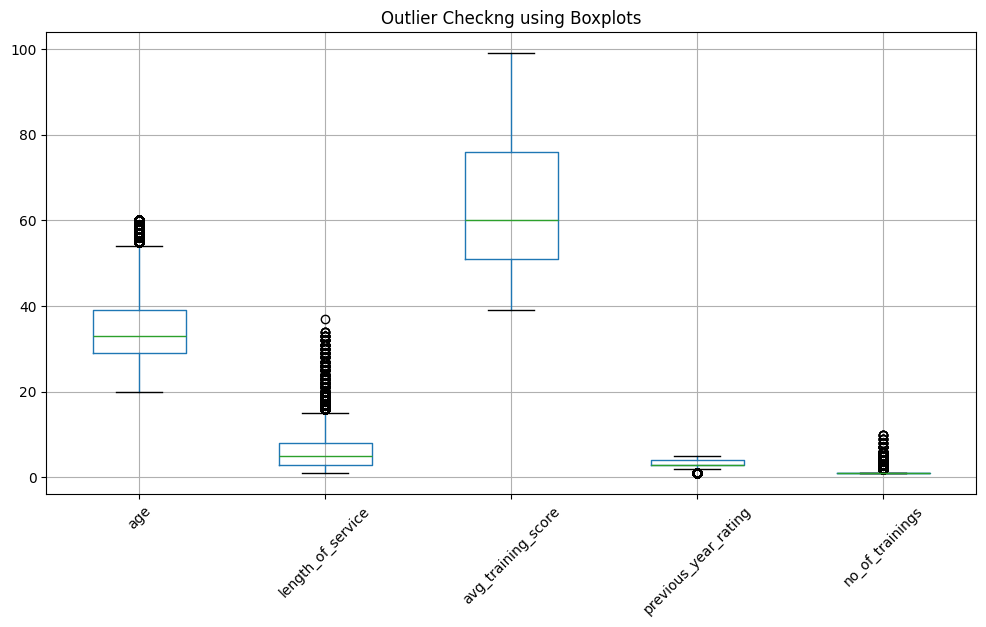

In [ ]:

#plot to detect outliers
num_cols = ['age', 'length_of_service', 'avg_training_score', 'previous_year_rating', 'no_of_trainings']
plt.figure(figsize=(12, 6))
df[num_cols].boxplot()
plt.title("Outlier Checkng using Boxplots")
plt.xticks(rotation=45)
plt.show()


To make my analysis better and maybe even make my machine learning model work better I'm gonna create a new feature. This new column I'm calling 'potential_promotion' will be like the target I'm aiming for with my predictions. I'll make a function called classify_potential_promotion that sorts employees into three groups: 'High', 'Medium', or 'Low' potential.

Here's how it works:

- If an employee got promoted, they automatically have 'High' potential. That's straightforward.
- If an employee wasn't promoted, but they have a good average training score (better than half the employees in the dataset) and their previous year's rating was more than 3, then I'll say they have 'Medium' potential.
- For everyone else who doesn't fit in the 'High' or 'Medium' categories, I'll assign them 'Low' potential.

After I've set up this classification logic, I'll use the function on each employee's data in my DataFrame using df.apply(). This creates the new 'potential_promotion' column and stores the results (High, Medium, or Low) there. To get a quick look at how many employees fall into each category, I'll use value_counts() and print it out.

Basically, what I'm doing here is called feature engineering. I'm using what I already know about the employees (like if they were promoted, their training score, and their past rating) to make a new feature – the 'potential_promotion' column. This might make my machine learning model even better at predicting who's likely to get promoted in the future. It's like giving the model a little extra hint. By grouping employees into different potential levels, I can also do some interesting analysis and get a better understanding of the data.

In [ ]:
def classify_potential_promotion(row):
    if row['is_promoted'] == 1:
        return 'High'
    elif row['avg_training_score'] > df['avg_training_score'].median() and row['previous_year_rating'] > 3:
        return 'Medium'
    else:
        return 'Low'

# Apply the function to create the 'potential_promotion' column
df['potential_promotion'] = df.apply(classify_potential_promotion, axis=1)

# Display the value counts of the new column
print(df['potential_promotion'].value_counts())

potential_promotion
Low       39243
Medium     8610
High       4546
Name: count, dtype: int64


In this part, I'm preparing my categorical features for machine learning. Many machine learning algorithms work best with numerical data, so I need to convert my categorical columns (like 'department', 'region', 'education', etc.) into a numerical format. I use a technique called one-hot encoding to do this.

The pd.get_dummies function from pandas creates new columns for each unique value within the specified categorical columns (categorical_cols). These new columns contain 1s and 0s, indicating the presence or absence of a particular category for each row. The drop_first=True argument helps avoid issues with multicollinearity by dropping the first category from each encoded feature. This transformation ensures that my categorical data is represented in a way that my machine learning model can understand and use effectively.

In [ ]:
# One-hot encoding
categorical_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

"Here, I'm separating my dataset into features (X) and the target variable (y). I want to predict 'potential_promotion,' so that's my target. I create 'X' by dropping the 'potential_promotion' column from my DataFrame ('df'), keeping all other columns as features. Then, I assign the 'potential_promotion' column to 'y,' which represents what I'm trying to predict.

In [ ]:
 # Features (all columns except the target)
X = df.drop('potential_promotion', axis=1)
y = df['potential_promotion']

In this step, I'm splitting my data into training and testing sets using the train_test_split function. I'm using 80% of the data for training (X_train, y_train) and reserving 20% for testing (X_test, y_test). The random_state=42 ensures that the split is reproducible, and stratify=y makes sure the proportion of different classes in the target variable ('potential_promotion') is maintained in both training and testing sets.

I'm also identifying the numerical columns in my dataset (num_cols), which will be standardized later to improve model performance.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
num_cols = ['age', 'length_of_service', 'avg_training_score', 'previous_year_rating', 'no_of_trainings']

In this section, I'm standardizing the numerical features I identified earlier (num_cols). Standardization is a preprocessing technique that transforms the data so that it has zero mean and unit variance. This can help improve the performance of machine learning models, especially those that are sensitive to the scale of features.

I'm using the StandardScaler from scikit-learn to perform the standardization. I first fit the scaler to the training data (X_train[num_cols]) and then transform both the training and testing data using the fitted scaler. This ensures that the scaling is consistent across both datasets and prevents data leakage from the testing set into the training set.

In [ ]:
num_cols = ['age', 'length_of_service', 'avg_training_score', 'previous_year_rating', 'no_of_trainings']
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In this code, I'm creating and training my Decision Tree model. I'm using the DecisionTreeClassifier from scikit-learn, and I'm setting some parameters to control the complexity of the tree, like max_depth (how deep the tree can grow), criterion (how the tree decides to split the data), min_samples_split (minimum samples required to split a node), and min_samples_leaf (minimum samples required in a leaf node). I'm also using random_state for reproducibility.

Then, I use model.fit(X_train, y_train) to train the model on my training data (X_train, y_train). This is where the model learns the patterns from the data to make predictions.

In [ ]:
model = DecisionTreeClassifier(max_depth=5, criterion='entropy', min_samples_split=100, min_samples_leaf=25, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=25,
                       min_samples_split=100, random_state=42)

 I'm using K-Fold cross-validation to evaluate my model's performance more robustly. I'm creating a KFold object with 10 splits (n_splits=10), which means the training data will be divided into 10 folds. The shuffle=True argument ensures that the data is shuffled before splitting, and random_state=42 ensures reproducibility.

Then, I use cross_val_score with the model, training data, and the KFold object to perform cross-validation. I'm using 'accuracy' as the scoring metric. This process will train and evaluate the model 10 times, each time using a different fold for testing and the remaining folds for training. The results will be stored in the scores variable, giving me a more reliable estimate of the model's performance.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="accuracy")

After training my model, I want to see how well it performs on new, unseen data. This line of code uses the trained model (model) to make predictions on the test data (X_test), which was set aside earlier. The predictions are stored in the y_pred variable. This is like asking the model to apply what it has learned from the training data to give us educated guesses for the target variable in the test set.

In [ ]:
y_pred = model.predict(X_test)

This part of the code is about visualizing the Decision Tree model that I've built. I'm using the plot_tree function to create a visual representation of the tree's structure. I'm specifying the feature_names (which are the column names from my dataset) and the class_names (which are 'Low', 'Medium', and 'High' for my target variable). I'm also setting some options like filled=True to color the nodes based on the class, fontsize=13 to adjust the text size, rounded=True to make the nodes visually appealing, and proportion=True to display the proportion of samples in each node.

Finally, I'm using plt.show() to actually display the plot in my notebook.

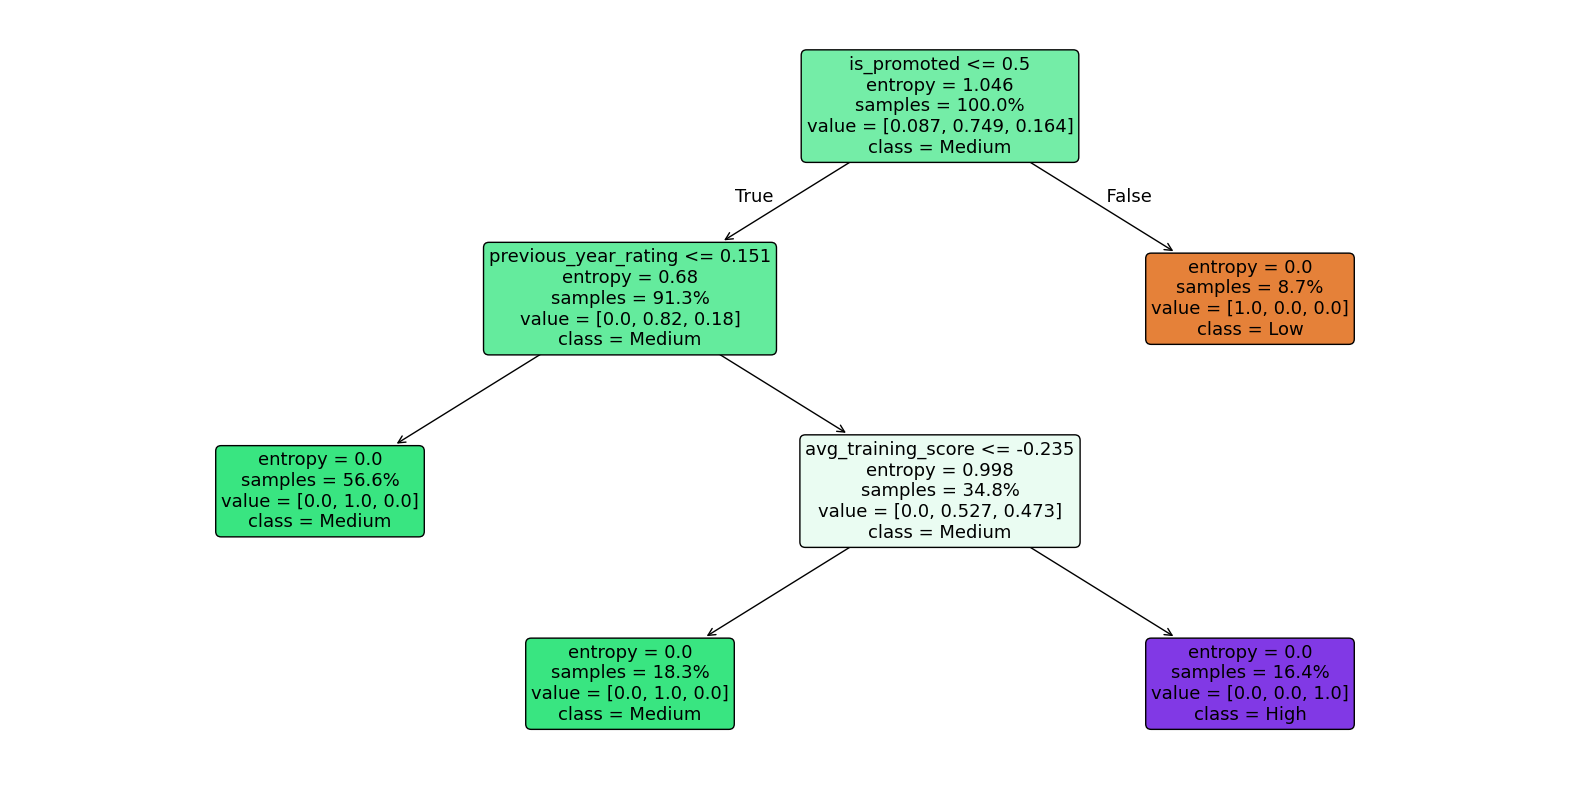

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=['Low', 'Medium', 'High'],
          filled=True, fontsize=13, rounded=True, proportion=True)
plt.show()

In this section, I'm evaluating the performance of my Decision Tree model using several metrics. First, I calculate the training accuracy, which measures how well the model predicts the target variable on the training data. Then, I calculate the testing accuracy, which assesses how well the model generalizes to new, unseen data (the test set). I also calculate precision, recall, and the F1-score to get a more comprehensive understanding of the model's performance.

Finally, I print these results to see the overall performance of my model on both the training and testing sets. This evaluation helps me understand how well the model has learned from the data and whether it is likely to perform well on real-world scenarios.

In [ ]:
train_accuracy = accuracy_score(y_train, model.predict(X_train)) # Calculate training accuracy
test_accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("Training Accuracy: {:.2f}".format(train_accuracy))
print("Testing Accuracy: {:.2f}".format(test_accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Training Accuracy: 1.00
Testing Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00
